# 🐷 Susie Package Test Notebook

### 🔵 Import the necessary python libraries and Susie objects.

Importing any packages and libraries needed, as well as the package from Test PyPi

In [1]:
# %pip install -q susie==1.2.2
# # %pip install -q pandas
# #%pip install -q numpy # INCLUDE THIS IF YOU DO NOT HAVE NUMPY

In [2]:
import numpy as np
import pandas as pd
# from susie.timing_data import TimingData
# from susie.ephemeris import Ephemeris
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
# Importing from src imports directly from source code
from src.susie.timing_data import TimingData
from src.susie.ephemeris import Ephemeris

<hr style="color: #D64309;">
<hr style="color: #D64309;">

## &#128309; Basic Usage

The basic creation and usage of the **TimingData** and **Ephemeris** objects. This will assume the following:

1. Your data is in JD TDB timing format and system
2. You have both transit and occultation data
3. You have mid time uncertainties included in your data

We will pull this data from the repository below.

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔷 **STEP 1:** Download the timing data (that includes occultations) from the GitHub repository

In [3]:
url = 'https://raw.githubusercontent.com/BoiseStatePlanetary/susie/refs/heads/main/example_data/wasp12b_tra_occ.csv'

# Read the CSV file directly from the URL
data = pd.read_csv(url)
tra_or_occs = np.array(data["tra_or_occ"])
epochs = np.array(data["epoch"].astype('int'))
mid_times = np.array(data["mid_time"])
mid_time_errs = np.array(data["mid_time_err"])

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔷 **STEP 2:** Add your transit and occultation data to the TimingData object.

In [4]:
# Create new transit times object with above data
timing_obj1 = TimingData('jd', epochs, mid_times, mid_time_uncertainties=mid_time_errs, tra_or_occ=tra_or_occs, time_scale='tdb')

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔷 **STEP 3:** Create the Ephemeris object and add your TimingData object.

In [5]:
ephemeris_obj1 = Ephemeris(timing_obj1)

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔷 **STEP 4:** Fit your transit time data to an ephemeris model. You can specify what type of model with the options 'linear' or 'quadratic'.

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

##### 🔹 The **Linear** Model

In [6]:
# Getting a linear model will solve for period and conjuction time (and their respective errors)
linear_model_data = ephemeris_obj1.fit_model('linear')

/Users/maliabarker/Desktop/susie/notebooks/../src/susie/ephemeris.py:100: RuntimeWarning: divide by zero encountered in divide
  period_tra = np.divide(mid_time_diff_tra, epochs_diff_tra)[-1] if x[tra_mask].size > 0 else np.nan


##### 🟢  EXAMPLE
Calling `fit_model` will return a dictionary of data. Below is an example of the dictionary returned for `linear_model_data`:

```
{'period': 1.0914196400440928,
 'period_err': 4.21033087274383e-08,
 'conjunction_time': 0.0023543850341696416,
 'conjunction_time_err': 9.256430832207615e-05,
 'model_type': 'linear',
 'model_data': array([2.35438503e-03, 2.53757421e+02, 2.58123099e+02...])}

```

In [7]:
# Uncomment this ↓↓↓↓ to see the real data!

# for key, value in linear_model_data.items():
#     print(f"{key}: {value}\n")

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

##### 🔹 The **Quadratic** Model

We can do the same process for a quadratic model by specifying 'quadratic' for the model type instead of linear. The same process above is shown below for the quadratic model.

In [8]:
# Getting a quadratic model will solve for period, conjuction time, and period change per epoch (and their respective errors)
quadratic_model_data = ephemeris_obj1.fit_model('quadratic')

/Users/maliabarker/Desktop/susie/notebooks/../src/susie/ephemeris.py:234: RuntimeWarning: divide by zero encountered in divide
  period_tra = np.divide(mid_time_diff_tra, epochs_diff_tra)[-1] if x[tra_mask].size > 0 else np.nan


##### 🟢  EXAMPLE
Below is an example of the dictionary returned for `quadratic_model_data`:

```
{'period': 1.0914217244026556,
'period_err': 1.543206321797526e-07,
'conjunction_time': 0.0005511865218625013,
'conjunction_time_err': 0.00014528672879359023,
'period_change_by_epoch': -9.902087992310958e-10,
'period_change_by_epoch_err': 7.206633676288036e-11,
'model_type': 'quadratic',
'model_data': array([5.51186522e-04, 2.53756075e+02, 2.58121761e+02, 3.20878495e+02...])}
```

In [9]:
# Uncomment this ↓↓↓↓ to see the real data!

# for key, value in quadratic_model_data.items():
#     print(f"{key}: {value}\n")

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

##### 🔹 The **Precession** Model

In [10]:
# Getting a quadratic model will solve for period, conjuction time, and period change per epoch (and their respective errors)
precession_model_data = ephemeris_obj1.fit_model('precession')

/Users/maliabarker/Desktop/susie/notebooks/../src/susie/ephemeris.py:369: RuntimeWarning: divide by zero encountered in divide
  period_tra = np.divide(mid_time_diff_tra, epochs_diff_tra)[-1] if x[tra_mask].size > 0 else np.nan


##### 🟢  EXAMPLE
*NOTE: This is incorrect. Needs to be fixed!*

Below is an example of the dictionary returned for `precession_model_data`:

```
{'period': 1.091419177243411,
'period_err': 5.2742554781294556e-06,
'conjunction_time': 2454515.5341239404,
'conjunction_time_err': 0.01180572813100868,
'eccentricity': 0.9733689469952322,
'eccentricity_err': 2854.540631393408,
'pericenter': -155322665.49323985,
'pericenter_err': 347918.9038971391,
'pericenter_change_by_epoch': -71560.06616158684,
'pericenter_change_by_epoch_err': 151.81905076798304,
'model_type': 'precession',
'model_data': array([2454515.53409434, 2454768.74344835, 2454773.10907557...])}
```

In [11]:
# Uncomment this ↓↓↓↓ to see the real data!

# for key, value in precession_model_data.items():
#     print(f"{key}: {value}\n")

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔷 **STEP 5:** Get BIC Values

We can get the BIC value for a specific model fit using the model data dictionaries returned from the `fit_model` method.

In [12]:
linear_bic_value = ephemeris_obj1.calc_bic(linear_model_data)
quadratic_bic_value = ephemeris_obj1.calc_bic(quadratic_model_data)
precession_bic_value = ephemeris_obj1.calc_bic(precession_model_data)

print(f"Linear Model BIC: {linear_bic_value}\nQuadratic Model BIC: {quadratic_bic_value}\nPrecession Model BIC: {precession_bic_value}")

Linear Model BIC: 386.71897985393696
Quadratic Model BIC: 184.99006009832587
Precession Model BIC: 398.67927230204737


And we can also get a $\Delta$ BIC value using the method `calc_delta_bic`. We do not need to input any data for this method. It will create the linear and quadratic models for you and calculate the BIC values for each model, then calculate the $\Delta$ BIC value. 

Keep in mind, it <span style="color: #4BA5DD;">**ONLY returns the $\Delta$ BIC value**</span> and not the other data calculated.

In [13]:
lq_delta_bic_value = ephemeris_obj1.calc_delta_bic("linear", "quadratic")
lp_delta_bic_value = ephemeris_obj1.calc_delta_bic("linear", "precession")
qp_delta_bic_value = ephemeris_obj1.calc_delta_bic("quadratic", "precession")

print(f"Linear vs. Quadratic \u0394 BIC: {lq_delta_bic_value}\nLinear vs. Precession \u0394 BIC: {lp_delta_bic_value}\nQuadratic vs. Precession \u0394 BIC: {qp_delta_bic_value}")

Linear vs. Quadratic Δ BIC: 201.7289197556111
Linear vs. Precession Δ BIC: -11.960292448110408
Quadratic vs. Precession Δ BIC: -213.6892122037215


<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔷 **STEP 6:** Plot your data!

Now you can use the model data dictionaries for plotting methods. Available plotting methods include:

* `plot_model`: This will plot the model predicted mid-times. This takes in a model data dictionary.
* `plot_timing_uncertainties`: This will plot the range of uncertainties for the model predicted mid-times. This takes in a model data dictionary.
* `plot_oc_plot`: This will plot the observed mid-times minus the linear model predicted mid-times (calculated with $x=E$, $y=T_0-PE$, $y_{\rm err}=\sigma T_0$) and a curve(s) with the quadratic term ($x=E$, $y=0.5 \frac{dP}{dE} (E - {\rm median} (E))^2$) or the precession terms ($$). This **DOES NOT** take a model data dictionary.
* `plot_running_delta_bic`: This will plot how the $\Delta$ BIC value changes as observations increase over time. This **DOES NOT** take a model data dictionary.
* `plot_running_analytical_delta_bic_quadratic`: This will plot how both the numerical $\Delta$ BIC value and the analytical $\Delta$ BIC value changes as observations increase over time. This **DOES NOT** take a model data dictionary.
* `plot_delta_bic_omit_one`: This omits one data point at a time for each epoch and calculates the corresponding change in $\Delta$ BIC with that data point excluded.

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

##### 🔹 Plot the model calculated mid-times

🔹 For the Linear Model

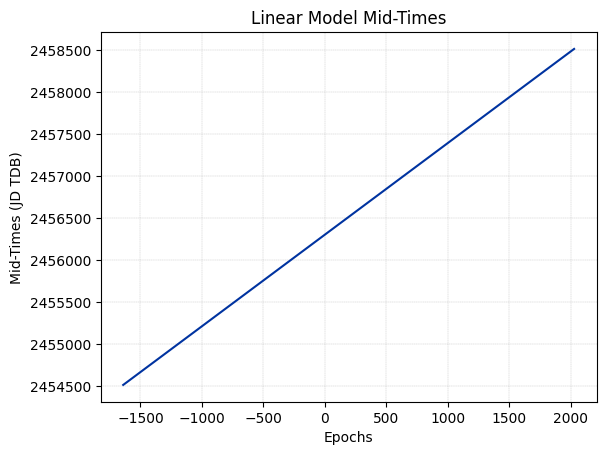

In [14]:
# Now we can plot this model
ephemeris_obj1.plot_model(linear_model_data, save_plot=False)
plt.show()

🔹 For the Quadratic Model

To see the quadratic effect in the data (which is very small compared to the linear term values) let's use the `subtract_lin_params` arg in the method below with the value `True`. This will subtract the linear terms from the data so we can see the pattern of the smaller quadratic terms. 

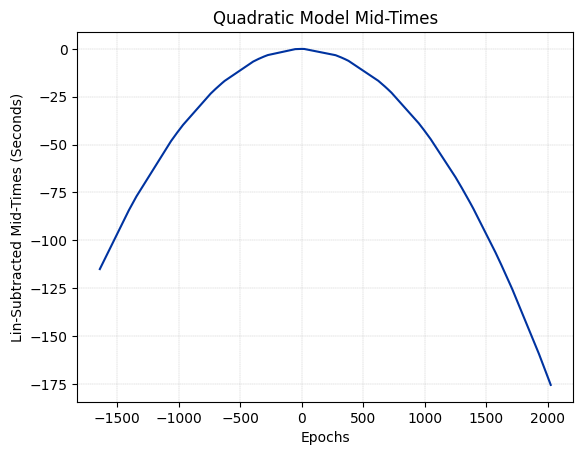

In [15]:
# Now we can plot this model
ephemeris_obj1.plot_model(quadratic_model_data, subtract_lin_params=True)
plt.show()

🔹 For the Precession Model

To see the non-linear effect in the data, we subtract the linear parameters as we did above. We can also set the arg `show_occultations` to `True` to see the occultations plotted seperately. 

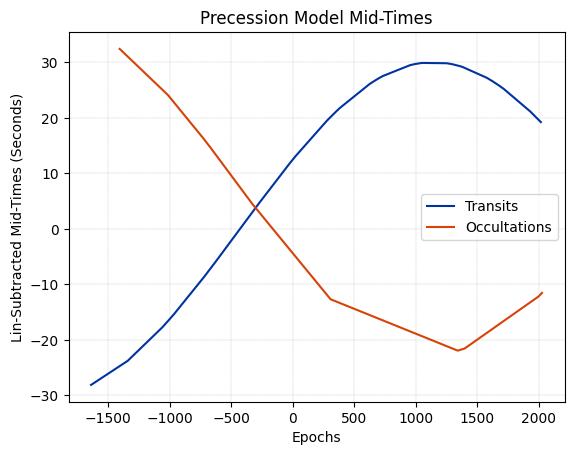

In [16]:
ephemeris_obj1.plot_model(precession_model_data, subtract_lin_params=True, show_occultations=True)
plt.show()

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

##### 🔹 Plot the model uncertainties

🔹 For the Linear Model

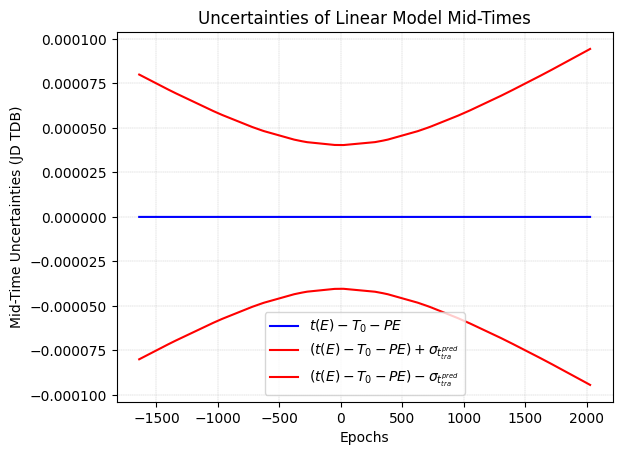

In [17]:
ephemeris_obj1.plot_timing_uncertainties(linear_model_data, save_plot=False)
plt.show()

🔹 For the Quadratic Model

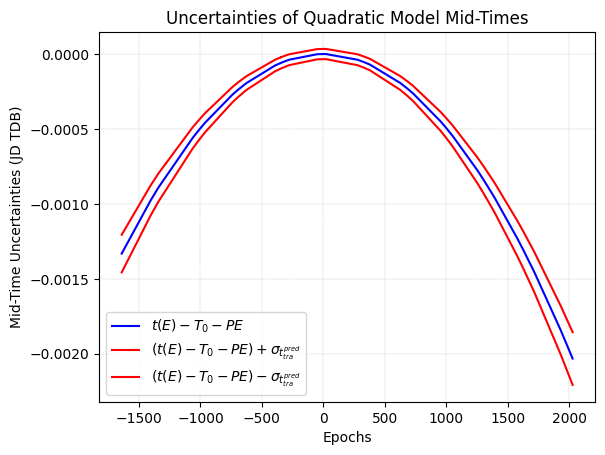

In [18]:
ephemeris_obj1.plot_timing_uncertainties(quadratic_model_data, save_plot=False)
plt.show()

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

##### 🔹 The O-C Plot

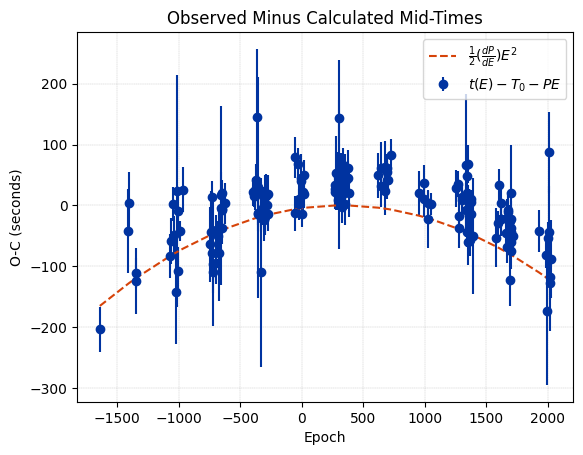

In [19]:
ephemeris_obj1.plot_oc_plot("quadratic")
plt.show()

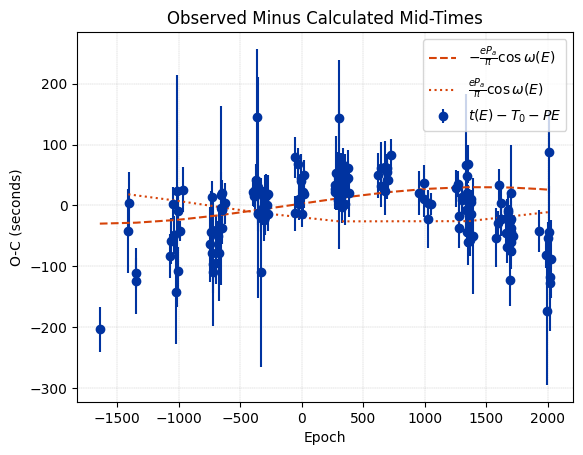

In [20]:
ephemeris_obj1.plot_oc_plot("precession")
plt.show()

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

##### 🔹 Plot the running $\Delta$ BIC

Comparing a linear model and a quadratic model

/Users/maliabarker/Desktop/susie/notebooks/../src/susie/ephemeris.py:100: RuntimeWarning: invalid value encountered in divide
  period_tra = np.divide(mid_time_diff_tra, epochs_diff_tra)[-1] if x[tra_mask].size > 0 else np.nan
/Users/maliabarker/Desktop/susie/notebooks/../src/susie/ephemeris.py:234: RuntimeWarning: invalid value encountered in divide
  period_tra = np.divide(mid_time_diff_tra, epochs_diff_tra)[-1] if x[tra_mask].size > 0 else np.nan


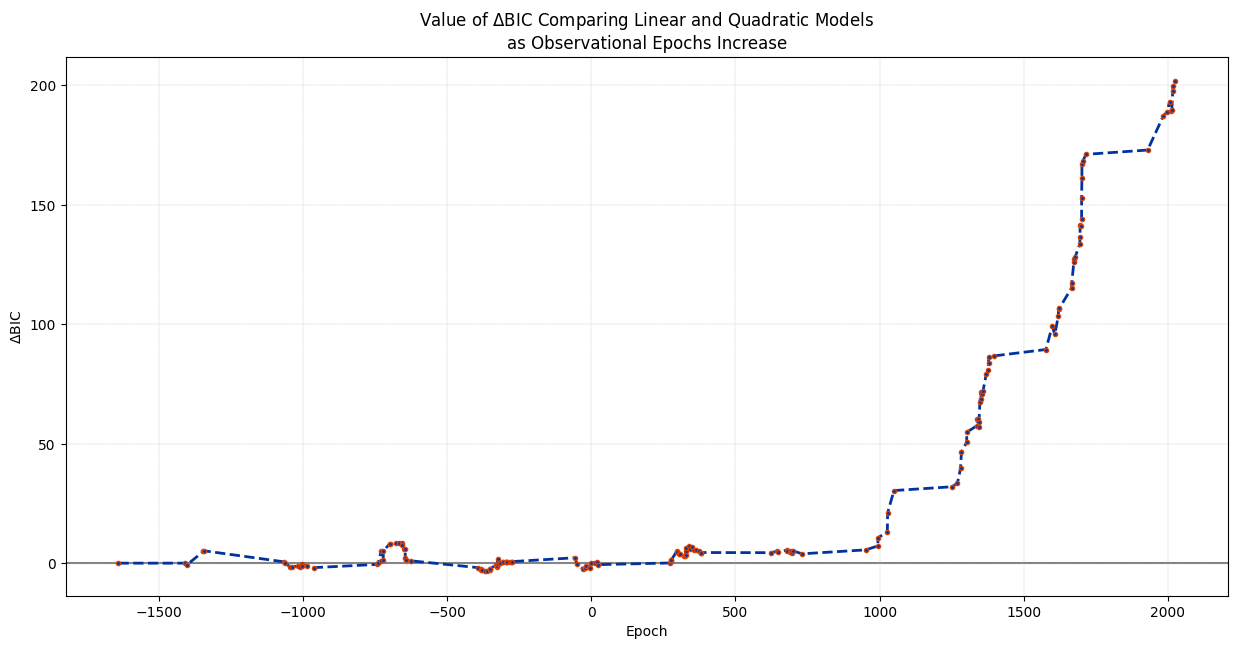

In [21]:
ephemeris_obj1.plot_running_delta_bic("linear", "quadratic")
plt.show()

Comparing a linear model and a precession model

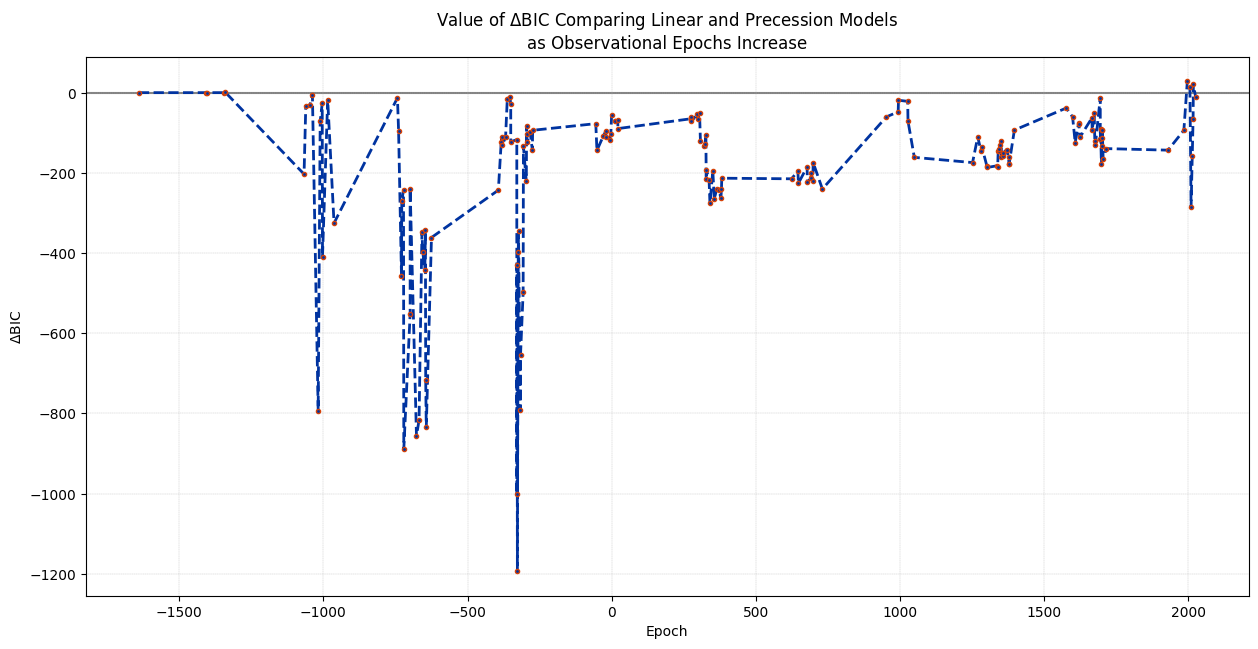

In [22]:
ephemeris_obj1.plot_running_delta_bic("linear", "precession")
plt.show()

Comparing a quadratic model and a precession model

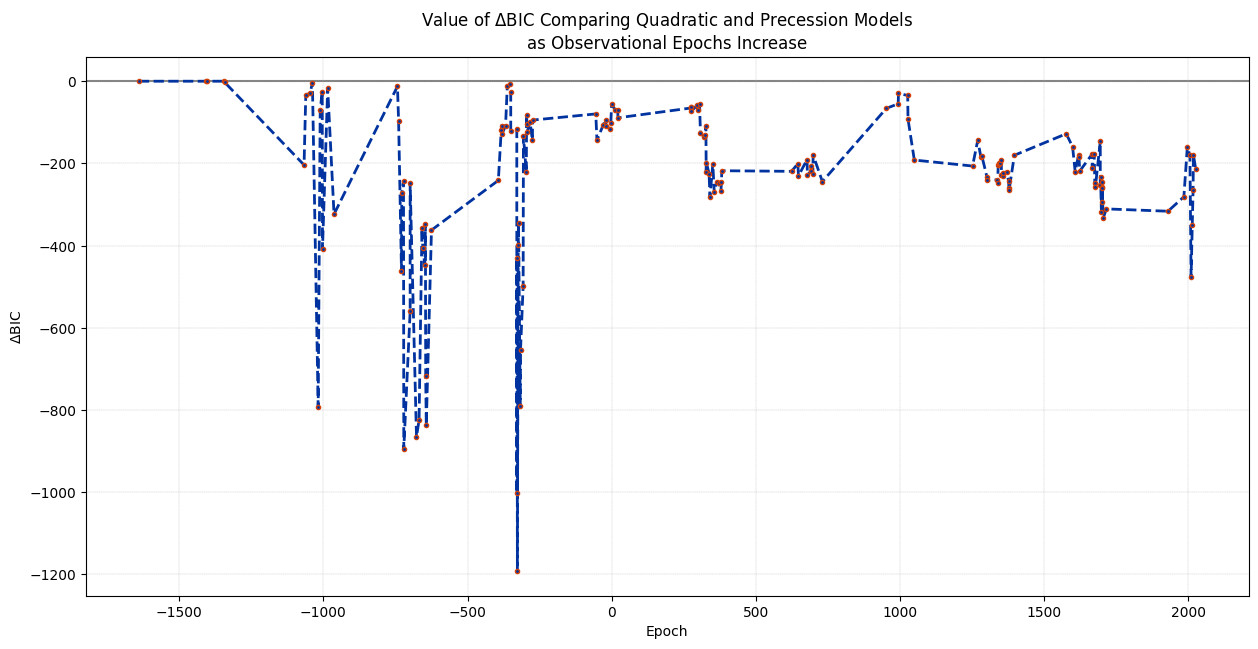

In [23]:
ephemeris_obj1.plot_running_delta_bic("quadratic", "precession")
plt.show()

##### 🔹 Plot the analytical running $\Delta$ BIC

As of right now, this is only available for comparing a linear model and a quadratic model.

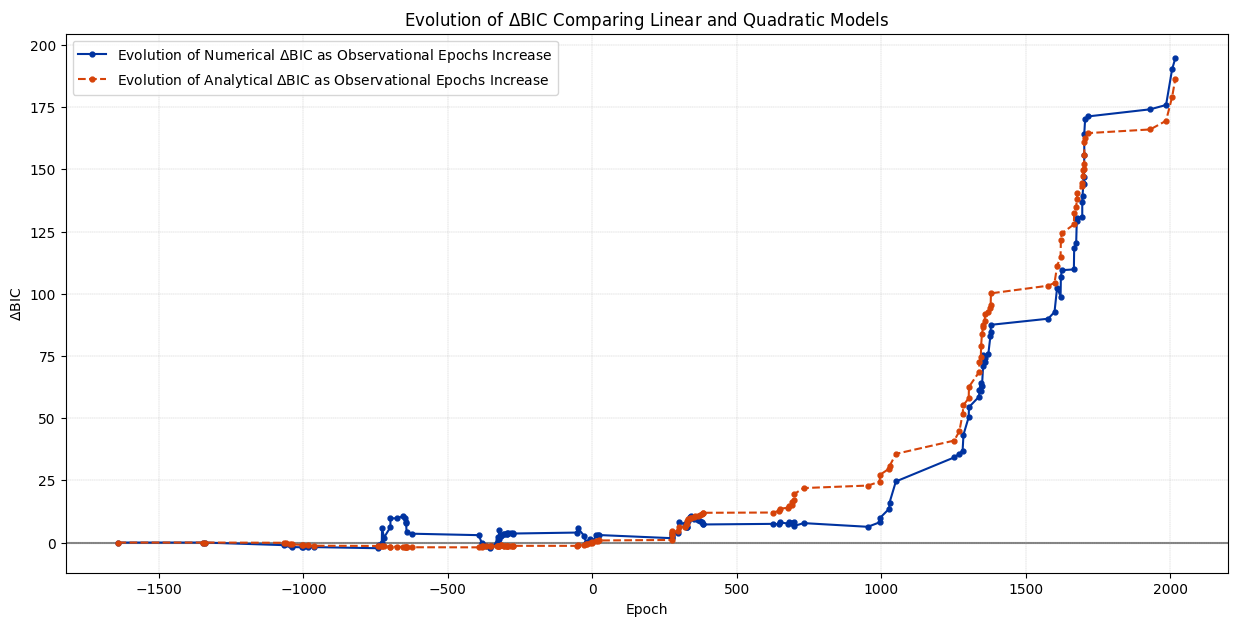

In [24]:
ephemeris_obj1.plot_running_analytical_delta_bic_quadratic()
plt.show()

##### 🔹 Plot the omit one $\Delta$ BIC

Comparing a linear model and a quadratic model

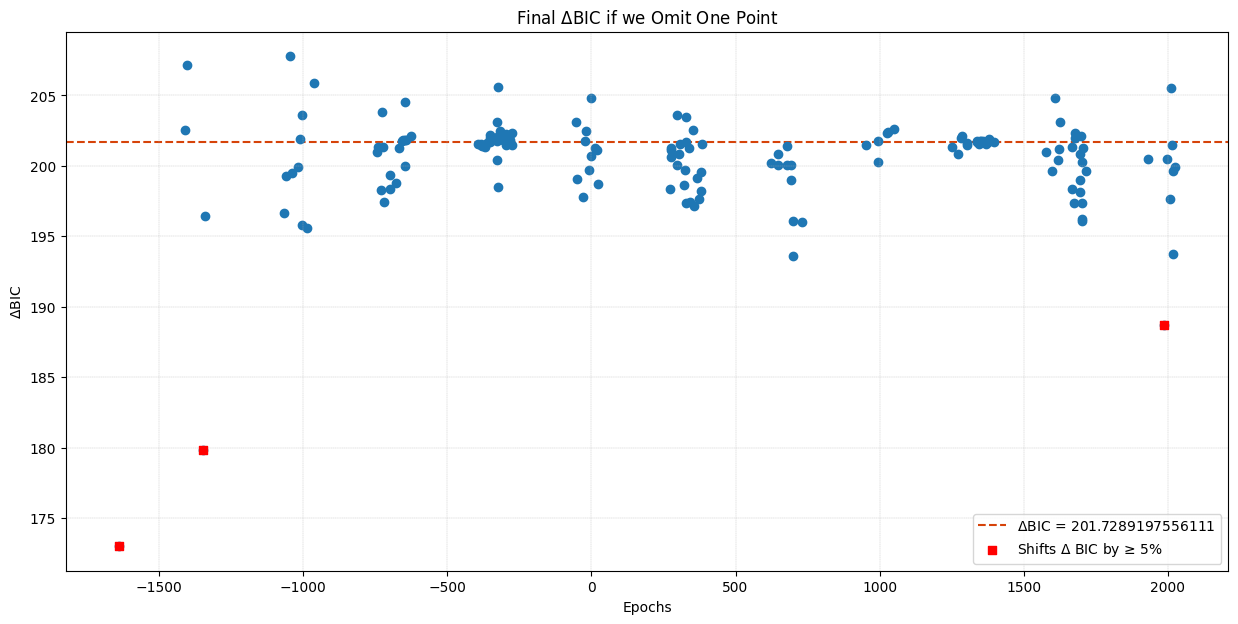

In [25]:
ephemeris_obj1.plot_delta_bic_omit_one("linear", "quadratic", outlier_percentage=5)
plt.show()

Comparing a linear model and a precession model

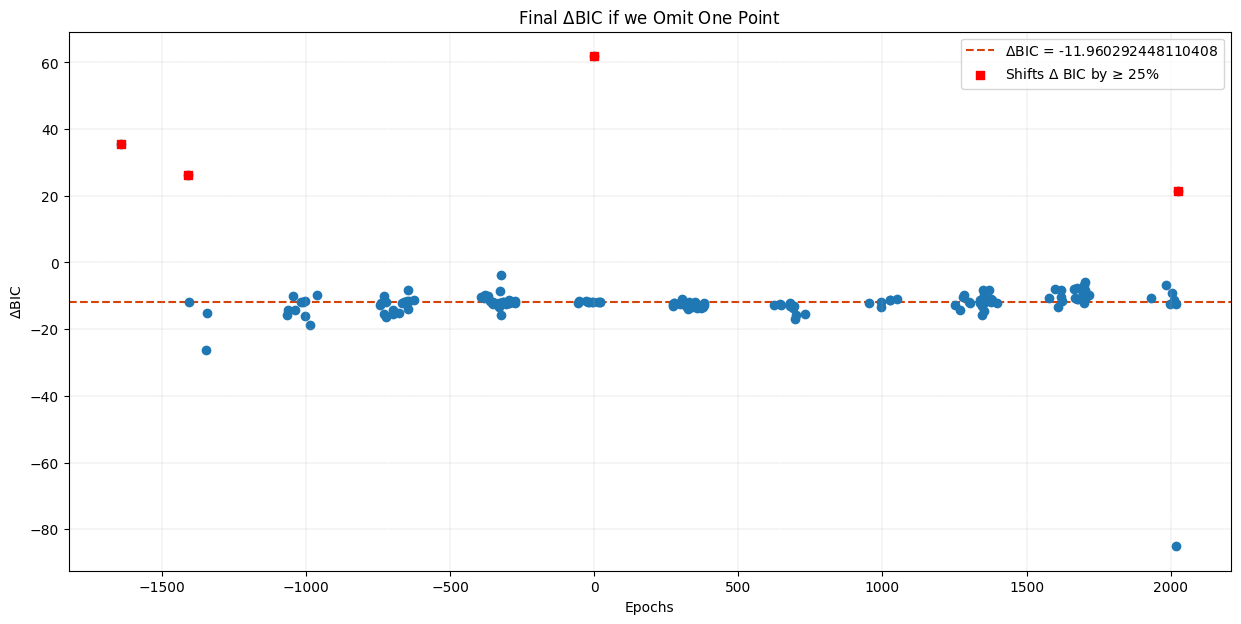

In [26]:
ephemeris_obj1.plot_delta_bic_omit_one("linear", "precession", outlier_percentage=25)
plt.show()

Comparing a quadratic model and a precession model

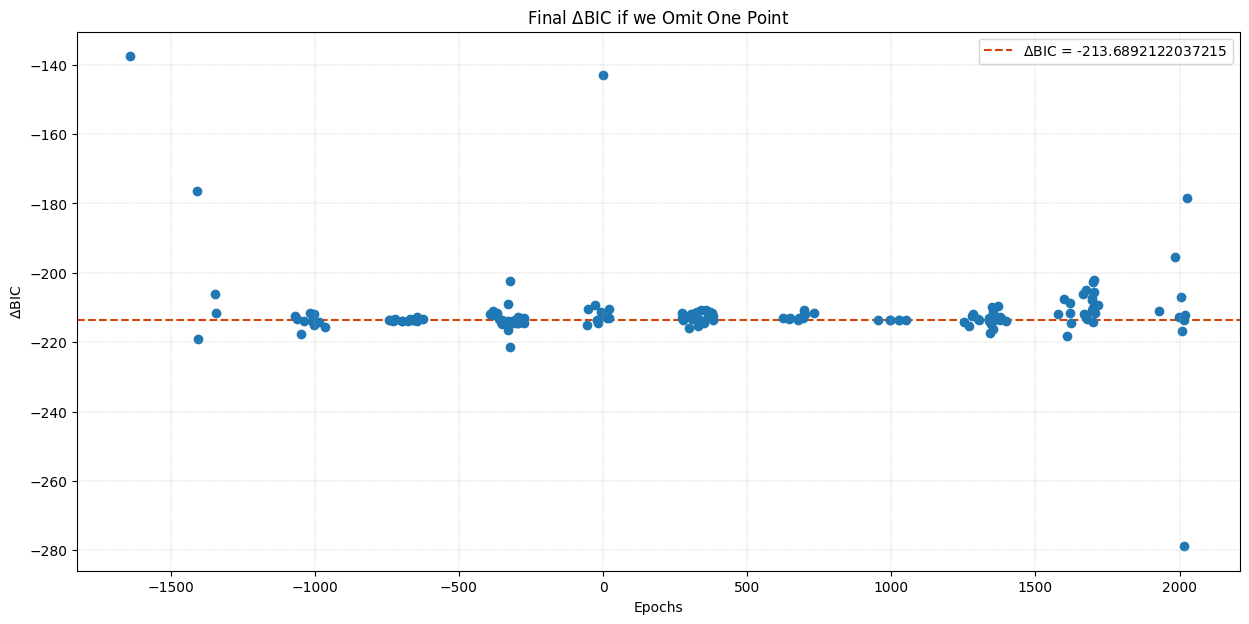

In [27]:
ephemeris_obj1.plot_delta_bic_omit_one("quadratic", "precession")
plt.show()

<hr style="color: #D64309;">
<hr style="color: #D64309;">

## 🔵 Other Timing Data Formats and Options

The default option (shown in the example above) for timing data:

* Is in JD TDB timing format and system
* Includes mid-time uncertainties
* Includes both transits AND occultations

However, there are a number of options you have for creating timing objects. A few include:

* Timing formats and systems different from JD TDB. For example, you can specify that your data is in JD with UTC timing system. If you do not specify the timing system, the code will default to UTC and will automatically correct for barycentric light travel time.

    <small> NOTE: If you choose to specify a different timing format and/or systems, or if you choose not to specify the timing system, REMEMBER the code will automatically convert your time to JD TDB timing format and system. If this happens, you will need to include some additional information including the position of your object in the sky (in RA and Dec) and the position of your observing location on Earth (in longitude and latitude). You ARE REQUIRED to input the coordinates of your object. You ARE NOT REQUIRED to specify your location on Earth, but this will generate a default position on Earth that corresponds to the North Pole.</small>

* No mid-time uncertainties. In this case, a placeholder list of 1s will be generated for functional purposes.

* No list specifying transits and occultations. If you do not include a list specifying if the data included is a transit or occultation (this will be the tra_or_occ parameter), then the code defaults to transits and will generate a list of 'tra' that has a number of values equal to the number of values of your epochs array.

Below are examples of how these options would work.

<hr style="color: #D64309;">

### 🔷 Using Timing Data that is NOT in JD TDB Format and System

Using timing data that is not corrected for barcentric light travel time and is in a timing format and system other than JD TDB. For example, we will assume this data is in the JD timing format with the UTC time scale. 

<small>NOTE: If you do not include a timing system parameter when you create the TimingData object, it will default to UTC and correct for barycentric light travel time</small>

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

### 🔹 Option 1: Including BOTH Object Coordinates and Observatory Coordinates

For this example, we show creating the object:
* WITHOUT specifying the timing system, which will default to UTC
* WITH specifying the timing system as UTC

<small>Note: These will both be the exact same because if the object is not given a timing system, it will default to UTC.</small>


We also include positional data for both:
* the **object coordinates**, which includes the right ascension and declination of WASP 12-b
* the **location of the observatory**, which includes the latitude and longitude of the Boise State observatory. 

<small>Note: This data was not collected from the BSU observatory, we just use this as an example. Also note, this data is already corrected for barycentric light travel time, so the resulting data is not actually correct. This is JUST AN EXAMPLE. </small>

In [28]:
# Not including time scale. Will default to UTC
timing_obj2 = TimingData('jd', epochs, mid_times, mid_time_uncertainties=mid_time_errs, object_ra=97.64, object_dec=29.67, observatory_lat=43.60, observatory_lon=-116.21)
# OR including time scale as UTC
timing_obj2 = TimingData('jd', epochs, mid_times, mid_time_uncertainties=mid_time_errs, time_scale='utc', object_ra=97.64, object_dec=29.67, observatory_lat=43.60, observatory_lon=-116.21)

Now the TimingData object contains the corrected mid-times and mid-time uncertainties. To see these corrected values, you can print the variables of the object by running the code below.

In [29]:
# Uncomment this ↓↓↓↓ to see the real data!

# for key, value in vars(timing_obj2).items():
#     print(f"{key}: {value}\n")

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

### 🔹 Option 2: Including ONLY Object Coordinates

We can also opt to **not include any observatory coordinates** (due to not knowing where to data was taken, for example). If this is not passed in, the object will default to the gravitational center of the Earth at x=0, y=0, z=0. 

We include positional data for the **object coordinates**, which includes the right ascension and declination of WASP 12-b. 

<small>Note: This data is already corrected for barycentric light travel time, so the resulting data is not actually correct. This is JUST AN EXAMPLE. </small>

<small style="color: #D64309;"><b> Don't be scared of the warnings! These are just warnings, nothing is wrong.</b></small>

In [30]:
# Including time scale as UTC. NOT passing in observatory coordinates
timing_obj3 = TimingData('jd', epochs, mid_times, mid_time_uncertainties=mid_time_errs, time_scale='utc', object_ra=97.64, object_dec=29.67)

In [31]:
# Uncomment this ↓↓↓↓ to see the real data!

# for key, value in vars(timing_obj3).items():
#     print(f"{key}: {value}\n")

<hr style="color: #D64309;">

### 🔷 Using Timing Data that does NOT include uncertainties

We do not have to include uncertainties for our mid-time data. If no uncertainties are given, the object will generate a default placeholder of 1's with the same number of values that are in your `epochs` array.

In [32]:
# Create new transit times object with above data
timing_obj4 = TimingData('jd', epochs, mid_times, time_scale='tdb')

In [33]:
# Uncomment this ↓↓↓↓ to see the real data!

# for key, value in vars(timing_obj4).items():
#     print(f"{key}: {value}\n")

<hr style="color: #D64309;">

### 🔷 Using Timing Data that does NOT include a transit or occultation array

We also do not need to include a `tra_or_occ` array. For example, if you only have transit data, you most likely would not include a `tra_or_occ` array because all of your data are transits. If we do not provide an array for `tra_or_occ`, then the object will generate a default placeholder of 'tra' with the same number of values that are in your `epochs` array.

In [34]:
# Create new transit times object with above data
timing_obj5 = TimingData('jd', epochs, mid_times, mid_time_uncertainties=mid_time_errs, time_scale='tdb')

In [35]:
# Uncomment this ↓↓↓↓ to see the real data!

# for key, value in vars(timing_obj5).items():
#     print(f"{key}: {value}\n")

<hr style="color: #D64309;">

There are many different ways to create your TimingData object. Once you have created the TimingData object with as much information as you can provide, continue with the **🔵 Basic Usage** workflow from Step 3.

<hr>
<hr>